In [31]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer,IterativeImputer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('data.csv')
pd.set_option('display.max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [37]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [39]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [41]:
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype !='float64':
        print(f'{col} : {df[col].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [43]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


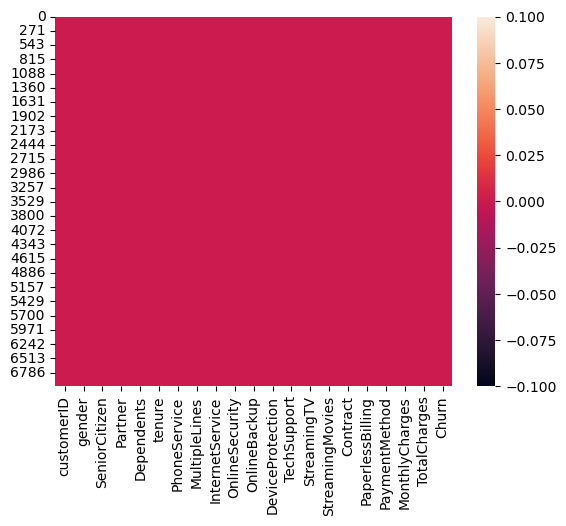

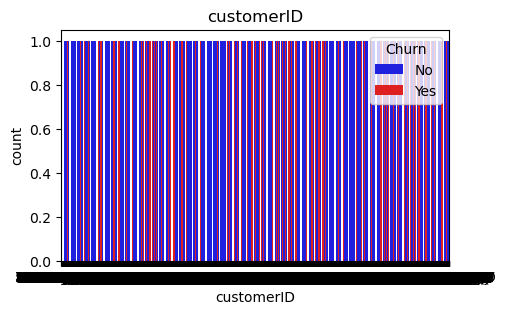

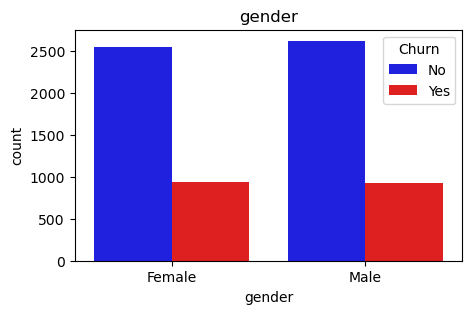

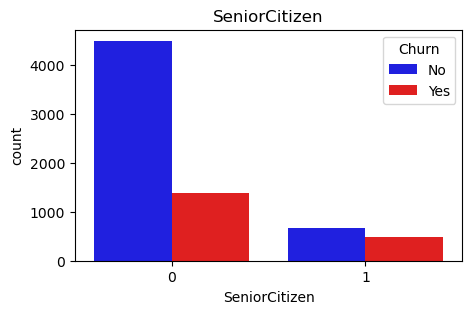

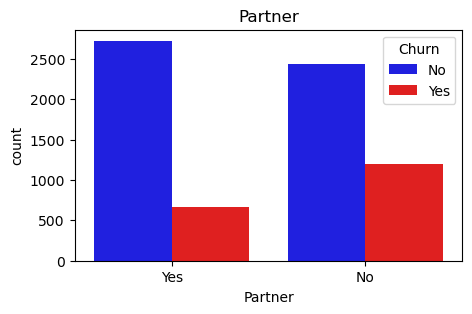

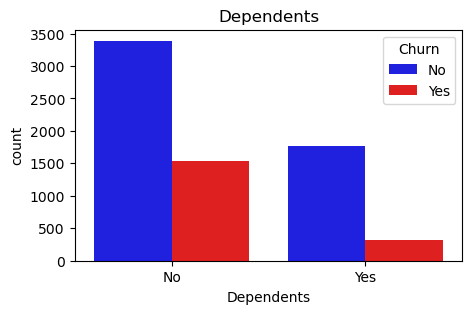

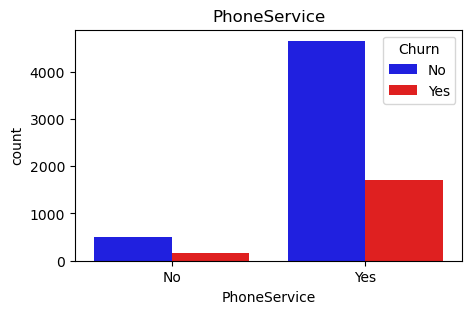

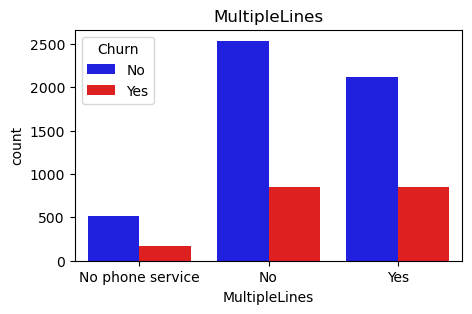

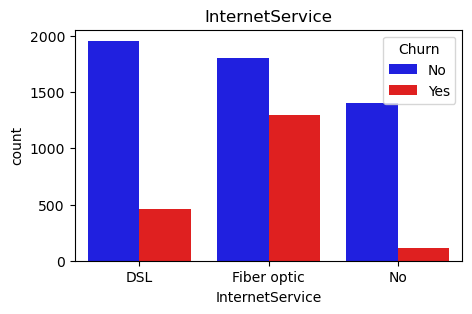

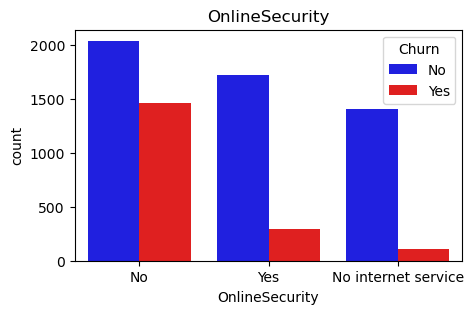

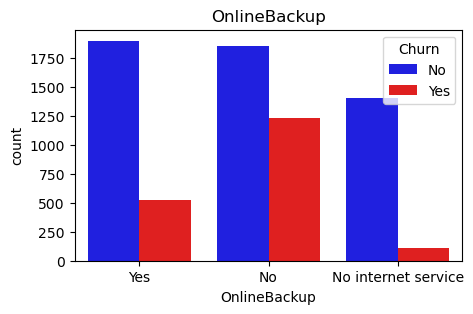

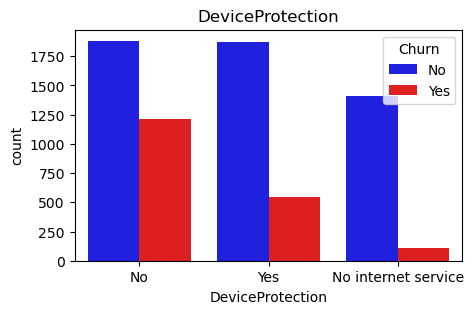

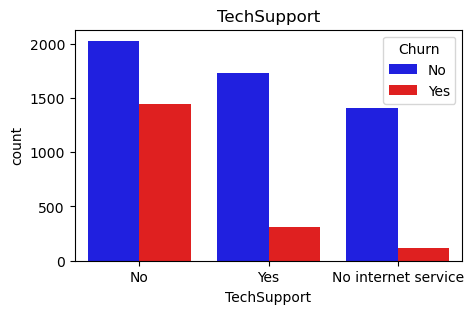

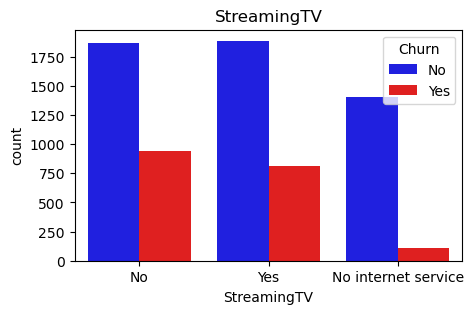

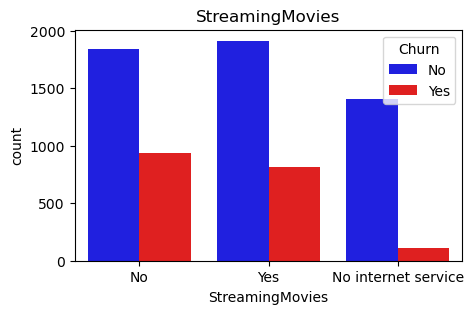

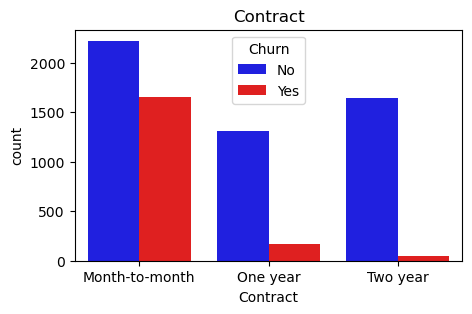

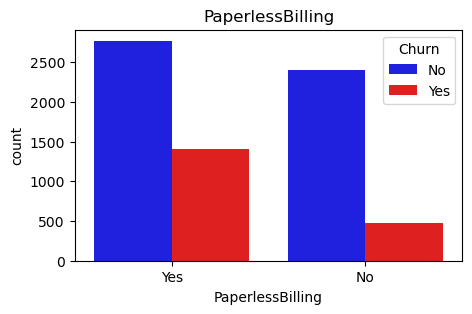

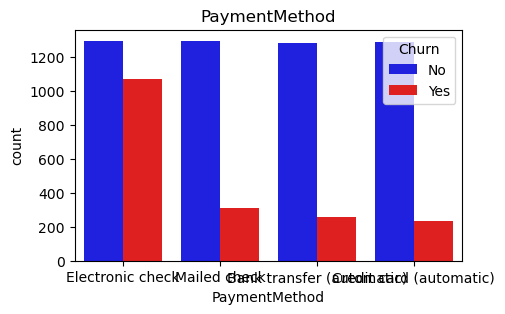

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
colors = {'Yes': 'red', 'No': 'blue'}

palette = {0: 'blue', 1: 'red'}

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(5, 3))
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.show()

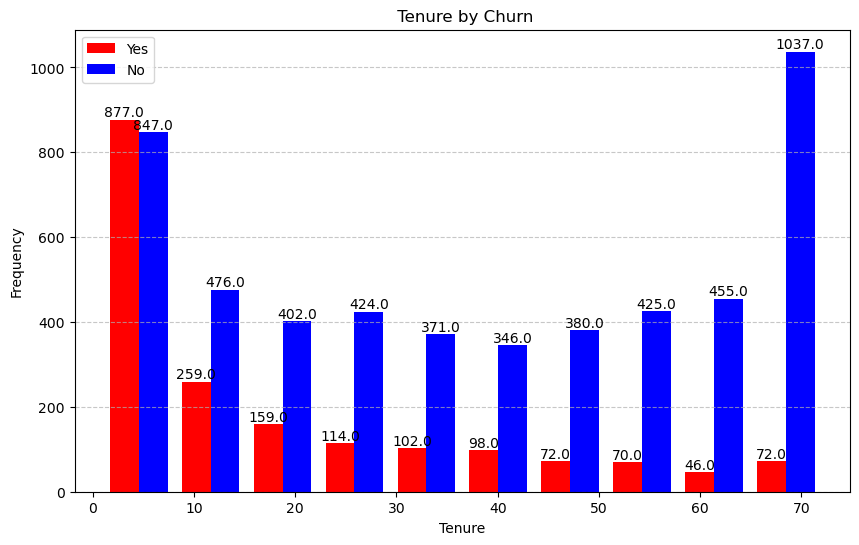

In [46]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')


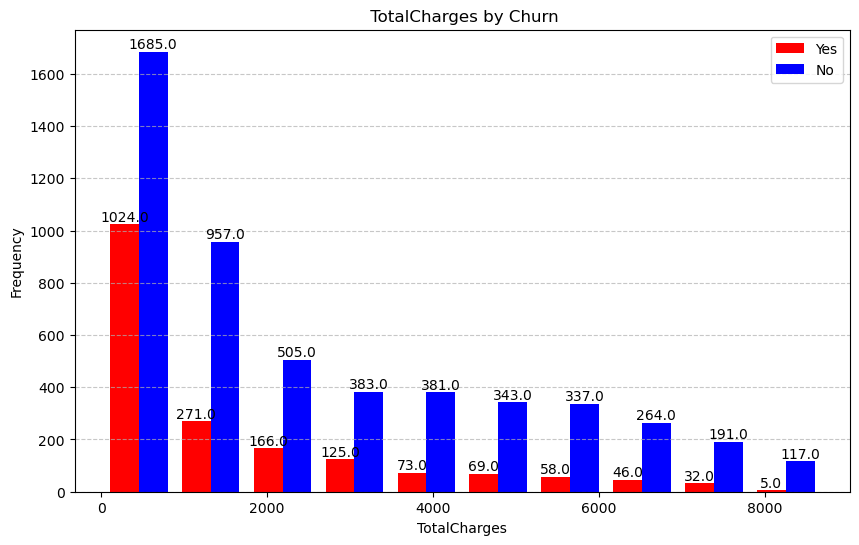

In [54]:
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')


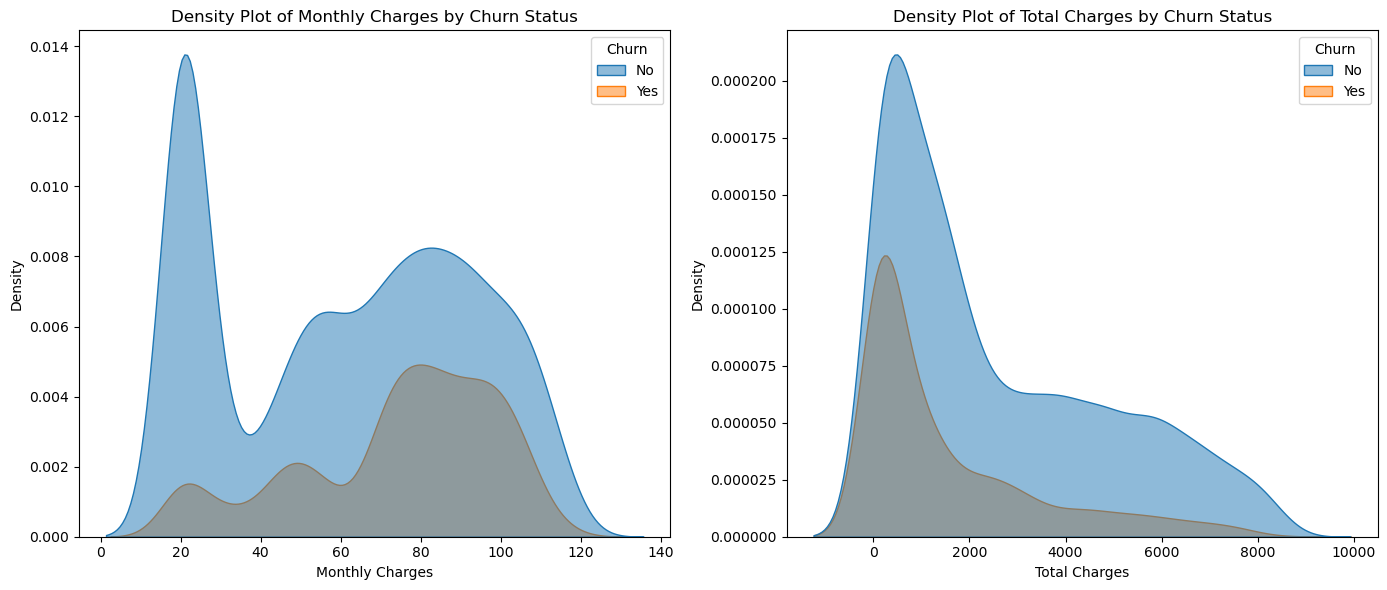

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Monthly Charges
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [68]:
categorical_cols = df.select_dtypes(include=['category','object']).columns
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_cols, inplace=True)

# Reset index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [70]:
df.drop('Churn_No', axis=1, inplace=True)

In [72]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0016-QLJIS,customerID_0017-DINOC,customerID_0017-IUDMW,customerID_0018-NYROU,customerID_0019-EFAEP,customerID_0019-GFNTW,customerID_0020-INWCK,customerID_0020-JDNXP,customerID_0021-IKXGC,customerID_0022-TCJCI,customerID_0023-HGHWL,customerID_0023-UYUPN,customerID_0023-XUOPT,customerID_0027-KWYKW,customerID_0030-FNXPP,customerID_0031-PVLZI,customerID_0032-PGELS,customerID_0036-IHMOT,customerID_0040-HALCW,customerID_0042-JVWOJ,customerID_0042-RLHYP,customerID_0048-LUMLS,customerID_0048-PIHNL,customerID_0052-DCKON,customerID_0052-YNYOT,customerID_0056-EPFBG,customerID_0057-QBUQH,customerID_0058-EVZWM,customerID_0060-FUALY,customerID_0064-SUDOG,customerID_0064-YIJGF,customerID_0067-DKWBL,customerID_0068-FIGTF,customerID_0071-NDAFP,customerID_0074-HDKDG,customerID_0076-LVEPS,customerID_0078-XZMHT,customerID_0080-EMYVY,customerID_0080-OROZO,customerID_0082-LDZUE,customerID_0082-OQIQY,customerID_0083-PIVIK,customerID_0089-IIQKO,customerID_0093-EXYQL,customerID_0093-XWZFY,customerID_0094-OIFMO,customerID_0096-BXERS,customerID_0096-FCPUF,customerID_0098-BOWSO,customerID_0100-DUVFC,customerID_0103-CSITQ,customerID_0104-PPXDV,customerID_0106-GHRQR,customerID_0106-UGRDO,customerID_0107-WESLM,customerID_0107-YHINA,customerID_0111-KLBQG,customerID_0112-QAWRZ,customerID_0112-QWPNC,customerID_0114-IGABW,customerID_0114-PEGZZ,customerID_0114-RSRRW,customerID_0115-TFERT,customerID_0117-LFRMW,customerID_0118-JPNOY,customerID_0121-SNYRK,customerID_0122-OAHPZ,customerID_0123-CRBRT,customerID_0125-LZQXK,customerID_0128-MKWSG,customerID_0129-KPTWJ,customerID_0129-QMPDR,customerID_0130-SXOUN,customerID_0133-BMFZO,customerID_0134-XWXCE,customerID_0135-NMXAP,customerID_0136-IFMYD,customerID_0137-OCGAB,customerID_0137-UDEUO,customerID_0139-IVFJG,customerID_0141-YEAYS,customerID_0142-GVYSN,customerID_0147-ESWWR,customerID_0148-DCDOS,customerID_0151-ONTOV,customerID_0156-FVPTA,customerID_0164-APGRB,customerID_0164-XAIRP,customerID_0168-XZKBB,customerID_0174-QRVVY,customerID_0177-PXBAT,customerID_0178-CIIKR,customerID_0178-SZBHO,customerID_0181-RITDD,customerID_0186-CAERR,customerID_0187-QSXOE,customerID_0187-WZNAB,customerID_0188-GWFLE,customerID_0191-EQUUH,customerID_0191-ZHSKZ,customerID_0193-ESZXP,customerID_0195-IESCP,customerID_0196-JTUQI,customerID_0196-VULGZ,customerID_0197-PNKNK,customerID_0201-MIBOL,customerID_0201-OAMXR,customerID_0203-HHYIJ,customerID_0206-OYVOC,customerID_0206-TBWLC,customerID_0207-MDKNV,customerID_0208-BPQEJ,customerID_0212-ISBBF,customerID_0214-JHPFW,customerID_0215-BQKGS,customerID_0218-QNVAS,customerID_0219-QAERP,customerID_0219-YTZUE,customerID_0220-EBGCE,customerID_0221-NAUXK,customerID_0221-WMXNQ,customerID_0222-CNVPT,customerID_0224-HJAPT,customerID_0224-NIJLP,customerID_0224-RLWWD,customerID_0225-ZORZP,customerID_0228-MAUWC,customerID_0229-LFJAF,customerID_0230-UBYPQ,customerID_0230-WEQUW,customerID_0231-LXVAP,customerID_0233-FTHAV,customerID_0234-TEVTT,customerID_0235-KGSLC,customerID_0236-HFWSV,customerID_0237-YFUTL,customerID_0238-WHBIQ,customerID_0239-OXEXL,customerID_0244-LGNFY,customerID_0247-SLUJI,customerID_0248-IPDFW,customerID_0248-PGHBZ,customerID_0253-ZTEOB,customerID_0254-FNMCI,customerID_0254-KCJGT,customerID_0254-WWRKD,customerID_0256-LTHVJ,customerID_0257-KXZGU,customerID_0257-ZESQC,customerID_0258-NOKBL,customerID_0259-GBZSH,customerID_0260-ZDLGK,customerID_0263-FJTQO,customerID_0264-CNITK,customerID_0265-EDXBD,customerID_0265-PSUAE,customerID_0266-CLZKZ,customerID_0266-GMEAO,customerID_0268-QKIWO,customerID_0269-XFESX,customerID_0270-THENM,customerID_0274-JKUJR,customerID_0277-BKSQP,customerID_0277-ORXQS,customerID_0278-YXOOG,customerID_0280-XJGEX,customerID_0281-CNTZX,customerID_0282-NVSJS,customerID_0285-INHLN,customerID_0289-IVARM,customerID_0

In [74]:
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [76]:
X = df.drop('Churn', axis=1)
y = df['Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# Initializing the list to store model scores
model_scores = []

# Defining the models and their hyperparameters
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
          'model__learning_rate': [0.05, 0.1, 0.5]}),  
    ('Naive Bayes', GaussianNB(), {})  
]

# Initializing variables to track the best model
best_model = None
best_accuracy = 0.0

# Iterating over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    
    accuracy = accuracy_score(y_test, y_pred)

    
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy,3))
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline


scores_df = pd.DataFrame(model_scores)


print("Best Model:")
print("Test Accuracy:", round(best_accuracy,3))
print("Model Pipeline:", best_model)




Model: Random Forest
Test Accuracy: 0.776

Model: Gradient Boosting
Test Accuracy: 0.792

Model: Support Vector Machine
Test Accuracy: 0.785

Model: Logistic Regression
Test Accuracy: 0.778

Model: K-Nearest Neighbors
Test Accuracy: 0.774

Model: Decision Tree
Test Accuracy: 0.762

Model: Ada Boost
Test Accuracy: 0.792

Model: Naive Bayes
Test Accuracy: 0.273

Best Model:
Test Accuracy: 0.792
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=200,
                                    random_state=42))])


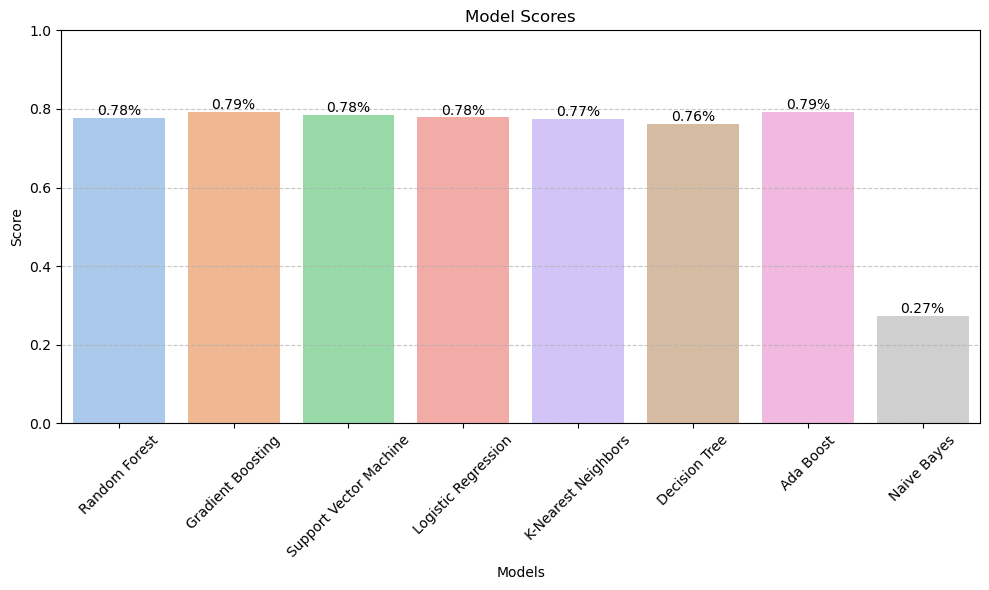

In [98]:
colors = sns.color_palette('pastel', n_colors=len(scores_df))


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
